In [12]:
# import machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# import accuracy_score method
from sklearn.metrics import accuracy_score


# import data
from sklearn.model_selection import train_test_split
import pandas as pd

stacking_train_data = pd.read_csv("../data/train/train.csv")
df = pd.DataFrame(stacking_train_data)
x = df.drop(['Id', 'Pawpularity'], axis=1)
y = df['Pawpularity']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# List of tuples containing name and classifier (default hyperparameters)
models = [('Logistic Regression',LogisticRegression()),
 ('Nearest Neighbors',KNeighborsClassifier()),
 ('Decision Tree',DecisionTreeClassifier()),
 ('Support Vector Classifier',SVC()),
 ('Naive Bayes',GaussianNB()),
 ('SVC Linear', SVC(kernel='linear'))]


In [13]:
accuracy_list = []
for model in models:
    model[1].fit(x_train, y_train)
    y_pred = model[1].predict(x_test)
    accuracy_list.append(accuracy_score(y_test, y_pred))
print(accuracy_list)

[0.025214321734745335, 0.0226928895612708, 0.02723146747352496, 0.02924861321230459, 0.0, 0.02168431669188099]


In [3]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

accuracy_history = []
scaler = StandardScaler()

# Define the values to test for polynomial degree, max_iter, and C
degree_values = [1, 2, 3]
max_iter_values = [100, 500, 1000]
C_values = [0.1, 1.0, 10.0]

accuracy_history = []

for degree in degree_values:
    poly = PolynomialFeatures(degree=degree)
    X_poly_train = poly.fit_transform(x_train)
    X_poly_test = poly.transform(x_test)
    
    scaler = StandardScaler()
    X_poly_train_scaled = scaler.fit_transform(X_poly_train)
    X_poly_test_scaled = scaler.transform(X_poly_test)
    
    for max_iter in max_iter_values:
        for C in C_values:
            reg = LogisticRegression(max_iter=max_iter, C=C)
            reg.fit(X_poly_train_scaled, y_train)
            y_pred = reg.predict(X_poly_test_scaled)
            accuracy = accuracy_score(y_test, y_pred)
            accuracy_history.append((degree, max_iter, C, accuracy))
            print(f"Degree={degree}, Max_iter={max_iter}, C={C}: Accuracy={accuracy}")

print(accuracy_history)

Degree=1, Max_iter=100, C=0.1: Accuracy=0.025214321734745335
Degree=1, Max_iter=100, C=1.0: Accuracy=0.025214321734745335
Degree=1, Max_iter=100, C=10.0: Accuracy=0.025214321734745335
Degree=1, Max_iter=500, C=0.1: Accuracy=0.025214321734745335
Degree=1, Max_iter=500, C=1.0: Accuracy=0.025214321734745335
Degree=1, Max_iter=500, C=10.0: Accuracy=0.025214321734745335
Degree=1, Max_iter=1000, C=0.1: Accuracy=0.025214321734745335
Degree=1, Max_iter=1000, C=1.0: Accuracy=0.025214321734745335
Degree=1, Max_iter=1000, C=10.0: Accuracy=0.025214321734745335
Degree=2, Max_iter=100, C=0.1: Accuracy=0.03177004538577912


/Users/pentiam1pro/projects/UCL/Machine_learning/pawpularity/pawpularityVenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Degree=2, Max_iter=100, C=1.0: Accuracy=0.031265758951084216


/Users/pentiam1pro/projects/UCL/Machine_learning/pawpularity/pawpularityVenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Degree=2, Max_iter=100, C=10.0: Accuracy=0.031265758951084216
Degree=2, Max_iter=500, C=0.1: Accuracy=0.03177004538577912
Degree=2, Max_iter=500, C=1.0: Accuracy=0.031265758951084216
Degree=2, Max_iter=500, C=10.0: Accuracy=0.030761472516389308
Degree=2, Max_iter=1000, C=0.1: Accuracy=0.03177004538577912
Degree=2, Max_iter=1000, C=1.0: Accuracy=0.031265758951084216
Degree=2, Max_iter=1000, C=10.0: Accuracy=0.030761472516389308


/Users/pentiam1pro/projects/UCL/Machine_learning/pawpularity/pawpularityVenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Degree=3, Max_iter=100, C=0.1: Accuracy=0.028240040342914774


/Users/pentiam1pro/projects/UCL/Machine_learning/pawpularity/pawpularityVenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Degree=3, Max_iter=100, C=1.0: Accuracy=0.028240040342914774


/Users/pentiam1pro/projects/UCL/Machine_learning/pawpularity/pawpularityVenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Degree=3, Max_iter=100, C=10.0: Accuracy=0.02773575390821987
Degree=3, Max_iter=500, C=0.1: Accuracy=0.028240040342914774
Degree=3, Max_iter=500, C=1.0: Accuracy=0.028744326777609682
Degree=3, Max_iter=500, C=10.0: Accuracy=0.02723146747352496
Degree=3, Max_iter=1000, C=0.1: Accuracy=0.028240040342914774
Degree=3, Max_iter=1000, C=1.0: Accuracy=0.028744326777609682
Degree=3, Max_iter=1000, C=10.0: Accuracy=0.02723146747352496
[(1, 100, 0.1, 0.025214321734745335), (1, 100, 1.0, 0.025214321734745335), (1, 100, 10.0, 0.025214321734745335), (1, 500, 0.1, 0.025214321734745335), (1, 500, 1.0, 0.025214321734745335), (1, 500, 10.0, 0.025214321734745335), (1, 1000, 0.1, 0.025214321734745335), (1, 1000, 1.0, 0.025214321734745335), (1, 1000, 10.0, 0.025214321734745335), (2, 100, 0.1, 0.03177004538577912), (2, 100, 1.0, 0.031265758951084216), (2, 100, 10.0, 0.031265758951084216), (2, 500, 0.1, 0.03177004538577912), (2, 500, 1.0, 0.031265758951084216), (2, 500, 10.0, 0.030761472516389308), (2, 1000

In [4]:
best_result = max(accuracy_history, key=lambda x: x[3])
best_degree, best_max_iter, best_C, best_accuracy = best_result

print(f"Best result: Degree={best_degree}, Max_iter={best_max_iter}, C={best_C}, Accuracy={best_accuracy}")

Best result: Degree=2, Max_iter=100, C=0.1, Accuracy=0.03177004538577912


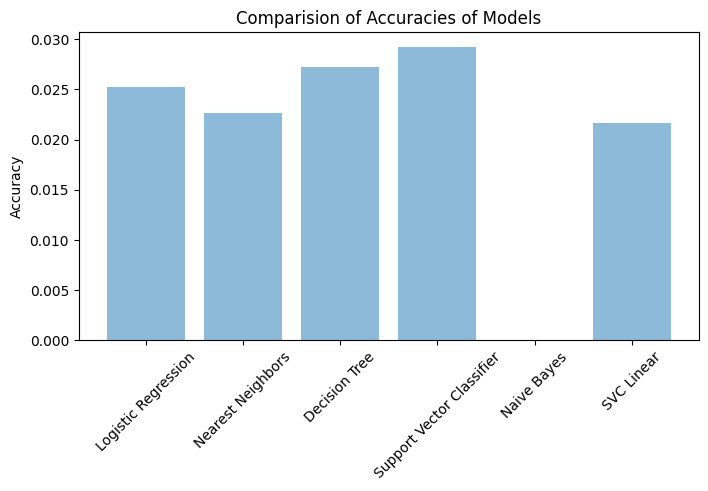

In [14]:
# import matplotlib for visualization
import matplotlib.pyplot as plt

# Bar chart of the accuracy of the models
plt.figure(figsize=(8, 4))
model_names = [x[0] for x in models]
y_pos = range(len(models))
plt.bar(y_pos, accuracy_list, align='center', alpha=0.5)
plt.xticks(y_pos, [x[0] for x in models], rotation=45)
plt.ylabel('Accuracy')
plt.title('Comparision of Accuracies of Models')
plt.show()

Pawpularity      1.000000
Accessory        0.018820
Group            0.017735
Face             0.012982
Collage          0.005485
Near             0.002247
Action           0.001883
Human            0.000895
Occlusion       -0.000956
Eyes            -0.001976
Info            -0.002306
Subject Focus   -0.006873
Blur            -0.020890
Name: Pawpularity, dtype: float64


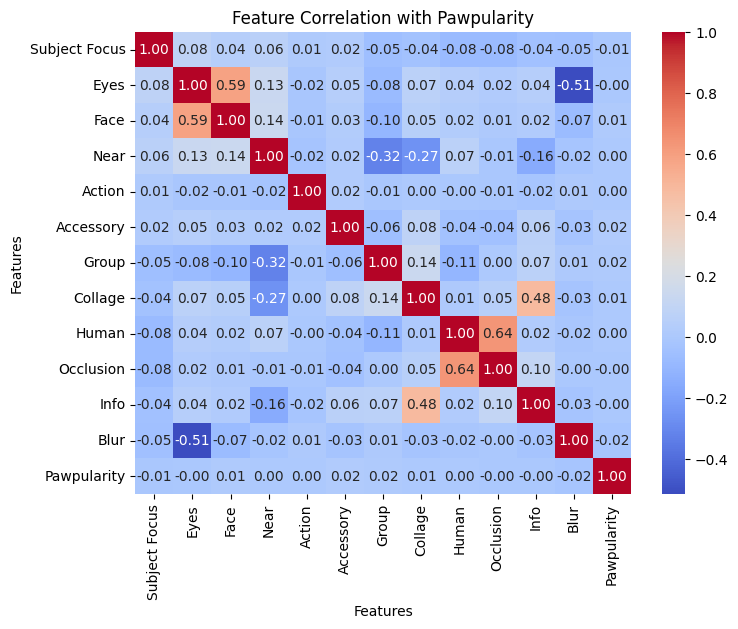

In [24]:
# Import seaborn to create a heatmap
import seaborn as sns

# heatmap of the correlation matrix
train_data_for_corr = x_train.copy()
train_data_for_corr['Pawpularity'] = y_train

correlation_matrix = train_data_for_corr.corr()

pawpularity_correlation = correlation_matrix['Pawpularity'].sort_values(ascending=False)
print(pawpularity_correlation)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation with Pawpularity')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

In [15]:
from sklearn.ensemble import StackingClassifier

# create stacking model
stacking_model = StackingClassifier(estimators=models, 
  final_estimator=LogisticRegression(), cv=3)

# fit the model on training data
stacking_model.fit(x_train, y_train)
y_pred = stacking_model.predict(x_test)

# calculate the accuracy of the model, with stacking
accuracy_score(y_test, y_pred)
accuracy_list.append(accuracy_score(y_test, y_pred))
model_names = [x[0] for x in models]
model_names.append("Stacked Model")

print(accuracy_list)

/Users/pentiam1pro/projects/UCL/Machine_learning/pawpularity/pawpularityVenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[0.025214321734745335, 0.0226928895612708, 0.02723146747352496, 0.02924861321230459, 0.0, 0.02168431669188099, 0.028744326777609682]


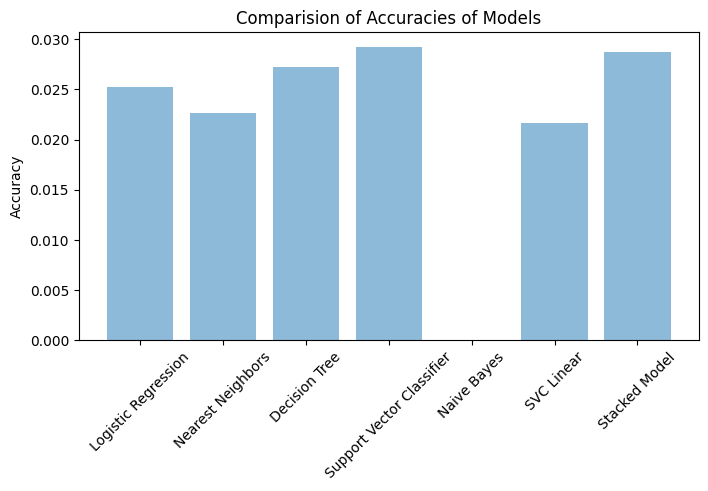

In [16]:
# Bar chart of the accuracy of the models, with stacking
plt.figure(figsize=(8, 4))
y_pos = range(len(model_names))
plt.bar(y_pos, accuracy_list, align='center', alpha=0.5)
plt.xticks(y_pos, model_names, rotation=45)
plt.ylabel('Accuracy')
plt.title('Comparision of Accuracies of Models')
plt.show()